# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Ezra Abednego]
- **Email:** [ezraabednego21@gmail.com]
- **ID Dicoding:** [ezra_abednego_vXui]

## Menentukan Pertanyaan Bisnis

- Pada range jam berapa pengguna layanan bike sharing akan mengalami peningkatan ?
- bagaimana performa pengguna registered dan casual dalam penggunaan bike sharing setiap bulannya ?
---



## Import Semua Packages/Library yang Digunakan

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os

## Data Wrangling

### Gathering Data

In [107]:
#Read File hour.csv => berisi mengenai pencatatan bike sharing selama setahun (2011-2012)
current_directory = os.getcwd()
path_csv= os.path.join(current_directory, 'hour.csv')
bike=pd.read_csv(path_csv)
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [108]:
bike.info()
#Tidak ada nilai yang null, karena jumlah datanya semua berjumlah 17379
#variabel dteday yang menunjukan tanggal seharusnya memiliki tipe data datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [109]:
print("Jumlah Data Duplikat:",bike.duplicated().sum()) #Tidak terdapat nilai yang duplikat

Jumlah Data Duplikat: 0


In [110]:
bike.describe() #Tidak terdapat value yang mencurigakan pada data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [111]:
#merubah dteday menjadi datetime
bike["dteday"]=pd.to_datetime(bike["dteday"])
bike.info() 
#dteday sudah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [112]:
bike.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Rangkuman statistik data diatas**
- Pengguna Casual memiliki rata rata 35 dan nilai min 0 dan max 367
- Pengguna Registered memiliki rata rata 153 dan nilai min 0 dan max 886
- untuk count (jumlah registered dan casual) memiliki rata rata pengguna 189 dan nilai min 1 max 977

**Dapat disimpulkan bahwa bike sharing memiliki jumlah rata rata pengguna 189 dan setiap harinya minimal terdapat 1 pengguna yang menggunakan layanan bike sharing dan nilai maksimal pengguna dalam satu hari sebanyak 977**

In [113]:
bike.groupby("hr").agg({
    "cnt":["max","min","mean","std","sum"]
})

cnt                                    
    max min        mean         std     sum
hr                                         
0   283   2   53.898072   42.307910   39130
1   168   1   33.375691   33.538727   24164
2   132   1   22.869930   26.578642   16352
3    79   1   11.727403   13.239190    8174
4    28   1    6.352941    4.143818    4428
5    66   1   19.889819   13.200765   14261
6   213   1   76.044138   55.084348   55132
7   596   1  212.064649  161.441936  154171
8   839   5  359.011004  235.189285  261001
9   426  14  219.309491   93.703458  159438
10  539   8  173.668501  102.205413  126257
11  663  10  208.143054  127.495536  151320
12  776   3  253.315934  145.081134  184414
13  760  11  253.661180  148.107657  184919
14  750  12  240.949246  147.271574  175652
15  750   7  251.233196  144.632541  183149
16  783  11  311.983562  148.682618  227748
17  976  15  461.452055  232.656611  336860
18  977  23  425.510989  224.639304  309772
19  743  11  311.523352  161.050359  226789
20  567  11  226.030220  119.670164  164550
21  584   6  172.314560   89.788893  125445
22  502   9  131.335165   69.937782   95612
23  256   2   87.831044   50.846889   63941

**Analisis Pengguna Berdasarkan Jam**
- Jam 4 memiliki tingkat penggunaan paling rendah daripada yang lain dengan rata rata 6 pengguna dan nilai max pengguna 28

- Jam 17 memiliki tingkat penggunaan paling tinggi dengan rata rata 461 pengguna dan nilai max pengguna di jam 17 adalah 976.

- Terdapat pola peningkatan pengguna, hal itu terjadi di jam 6 menuju 7-8 dan peningkatan terjadi juga ketika jam 15 memasuki 16-19. Hal ini terjadi disebabkan oleh penggunaan oleh pelajar dan pekerja untuk melakukan mobilitas berangkat dan pulang dari aktivitas mereka. 

In [114]:
bike.groupby(["yr","mnth"]).agg({
    "casual":"sum",
    "registered":"sum"
})

casual  registered
yr mnth                    
0  1       3073       35116
   2       6242       41973
   3      12826       51219
   4      22346       72524
   5      31050      104771
   6      30612      112900
   7      36452      104889
   8      28842      107849
   9      26545      100873
   10     25222       98289
   11     15594       86573
   12      8448       78875
1  1       8969       87775
   2       8721       94416
   3      31618      133257
   4      38456      135768
   5      44235      151630
   6      43294      159536
   7      41705      161902
   8      43197      171306
   9      43778      174795
   10     34538      164303
   11     21009      131655
   12     13245      110468

**Analisis Data pengguna registered dan casual pada tiap bulan**
- Pengguna bike sharing didominasi oleh pengguna yang sudah terdaftar atau registered, dilihat dari data diatas jumlah penggunaan bike sharing oleh registered selalu lebih banyak dari yang casual. hal ini tentunya dipengaruhi oleh penggunaan yang dilakukan sehari hari oleh pengguna registered dalam melakukan mobilisasi seperti berangkat dan pulang kerja / sekolah.

## Visualization & Explanatory Analysis

In [115]:
bike_hr=bike.groupby("hr").agg({
    "cnt":"mean"
})
bike_hr.rename(columns={
    "cnt":"Count",
}, inplace=True)
bike_hr.head(24)

,Count
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


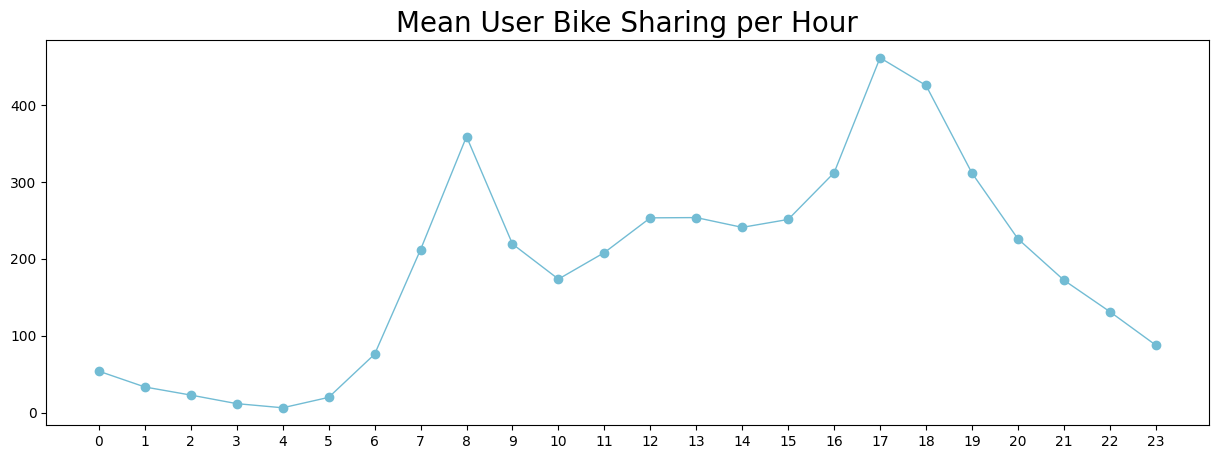

In [122]:
bike_hr=bike.groupby("hr").agg({
    "cnt":"mean"
})
bike_hr.rename(columns={
    "cnt":"Count",
}, inplace=True)
bike_hr = bike_hr.sort_values(by="hr")
plt.figure(figsize=(15, 5)) 
plt.plot(bike_hr.index, bike_hr["Count"], marker='o', linewidth=1, color="#72BCD4") 
plt.title("Mean User Bike Sharing per Hour", loc="center", fontsize=20) 
plt.xticks(bike_hr.index, labels=bike_hr.index, fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

**Analisis Mean User Bike Sharing per Hour**
- Jam 17 merupakan titik penggunaan bike sharing tertinggi
- lonjakan penggunaan terjadi ketika 6-8 dan 16-17 hal ini tentunya terdapat penyebabnya
- terjadinya pelonjakan jika menurut saya hal ini terjadi karena mobilitas pengguna yang ingin berangkat dan pulang dari sekolah maupun tempat kerjanya, analisis ini masih sebatas asumsi

In [ ]:
monthly_orders_df = bike.resample(rule='M', on='dteday').agg({
    "casual":"sum",
    "registered": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "casual":"Pengguna Casual",
    "registered": "Pengguna Registered"
}, inplace=True)
monthly_orders_df.head(24)

C:\Users\Ezra\AppData\Local\Temp\ipykernel_7312\2293184674.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = bike.resample(rule='M', on='dteday').agg({


,dteday,Pengguna Casual,Pengguna Registered
0,2011-01,3073,35116
1,2011-02,6242,41973
2,2011-03,12826,51219
3,2011-04,22346,72524
4,2011-05,31050,104771
5,2011-06,30612,112900
6,2011-07,36452,104889
7,2011-08,28842,107849
8,2011-09,26545,100873
9,2011-10,25222,98289


C:\Users\Ezra\AppData\Local\Temp\ipykernel_7312\1941508122.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = bike_2021.resample(rule='M', on='dteday').agg({


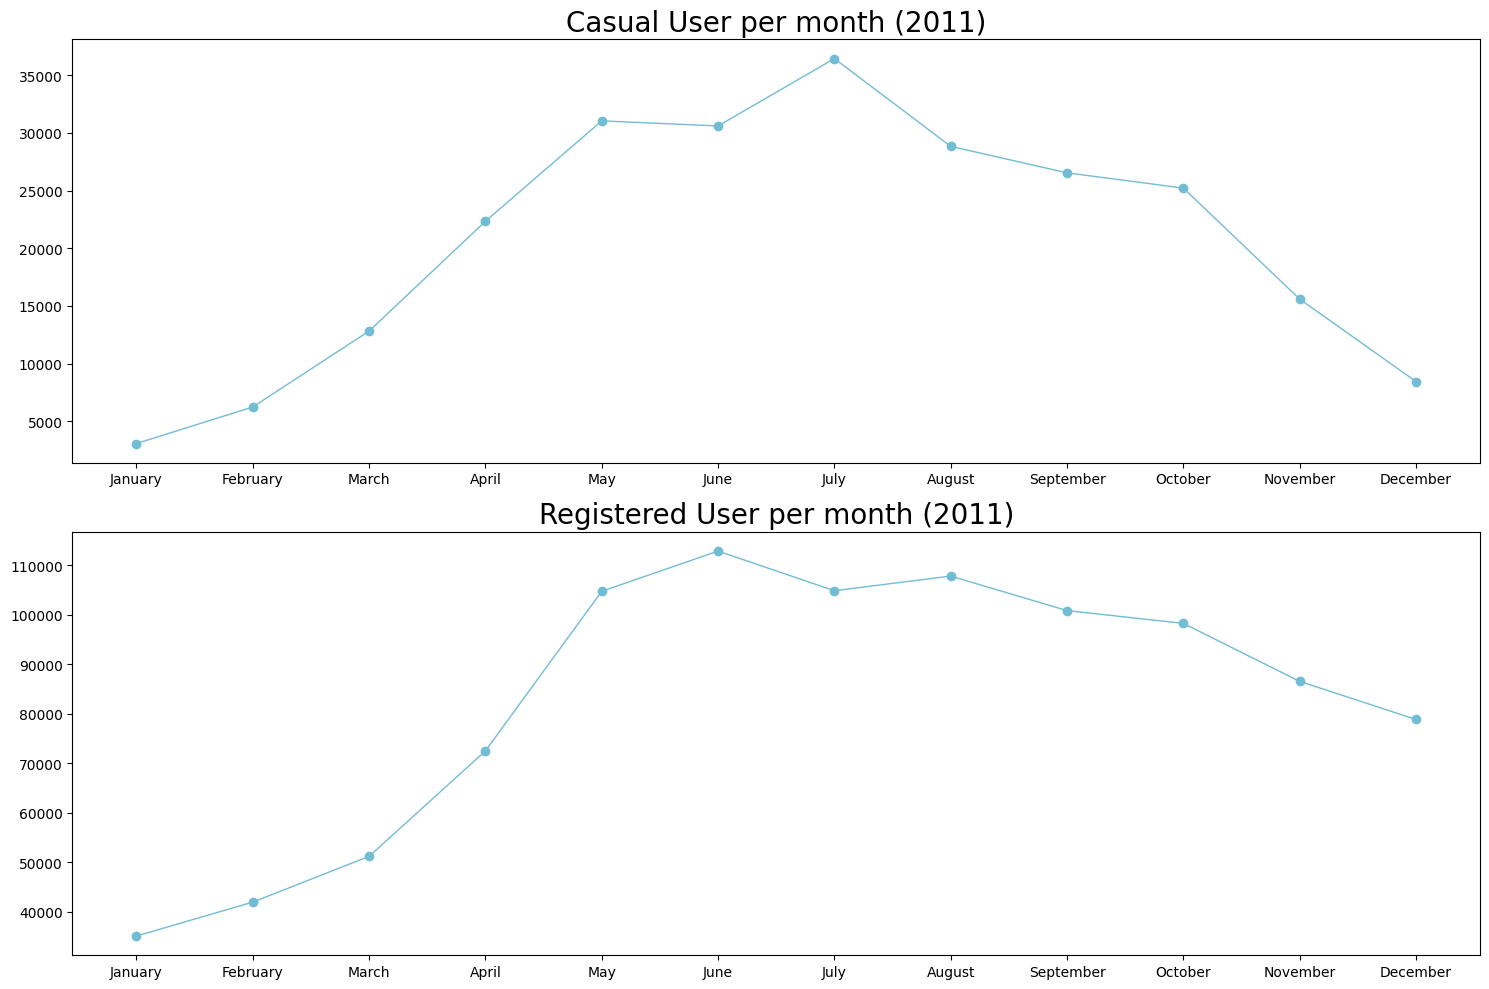

In [ ]:
bike_2021=bike[bike['dteday'].dt.year==2011]
monthly_orders_df = bike_2021.resample(rule='M', on='dteday').agg({
    "casual":"sum",
    "registered":"sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "casual":"Pengguna_Casual",
    "registered":"Pengguna_registered"
}, inplace=True)

plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["Pengguna_Casual"], marker='o', linewidth=1, color="#72BCD4") 
plt.title("Casual User per month (2011)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

plt.subplot(2, 1, 2)
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["Pengguna_registered"], marker='o', linewidth=1, color="#72BCD4") 
plt.title("Registered User per month (2011)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

plt.tight_layout()

plt.show()
 

**Analisis Line Chart Registered dan Casual user di 2011**
- Penggunaan layanan bike sharing oleh casual user memiliki titik tertinggi pada bulan juli hal ini tentunya disebabkan oleh sesuatu, sehingga hal ini dapat digunakan untuk pertimbangan persiapan armada sebelum bulan juli pada tahun selanjutnya sehingga pengguna tetap dapat terhandle dengan baik.
- Penggunaan layanan bike sharing oleh registered user memiliki titik tertinggi pada Juni, hal ini berbanding terbalik dengan pengguna casual yang mengalami penurunan pada bulan juni. tentunya hal ini perlu diselidiki sebabnya dan dapat dilakukan pengantisipasian penyiapan armada yang mencukupi pada beberapa spot yang memiliki peningkatan pengguna yang signifikan.
- Bulan oktober-desember memiliki trend penurunan untuk kedua user, tentunya hal ini perlu dianalisis lebih lanjut penyebab penurunan pengguna.

C:\Users\Ezra\AppData\Local\Temp\ipykernel_7312\1627669411.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = bike_2021.resample(rule='M', on='dteday').agg({


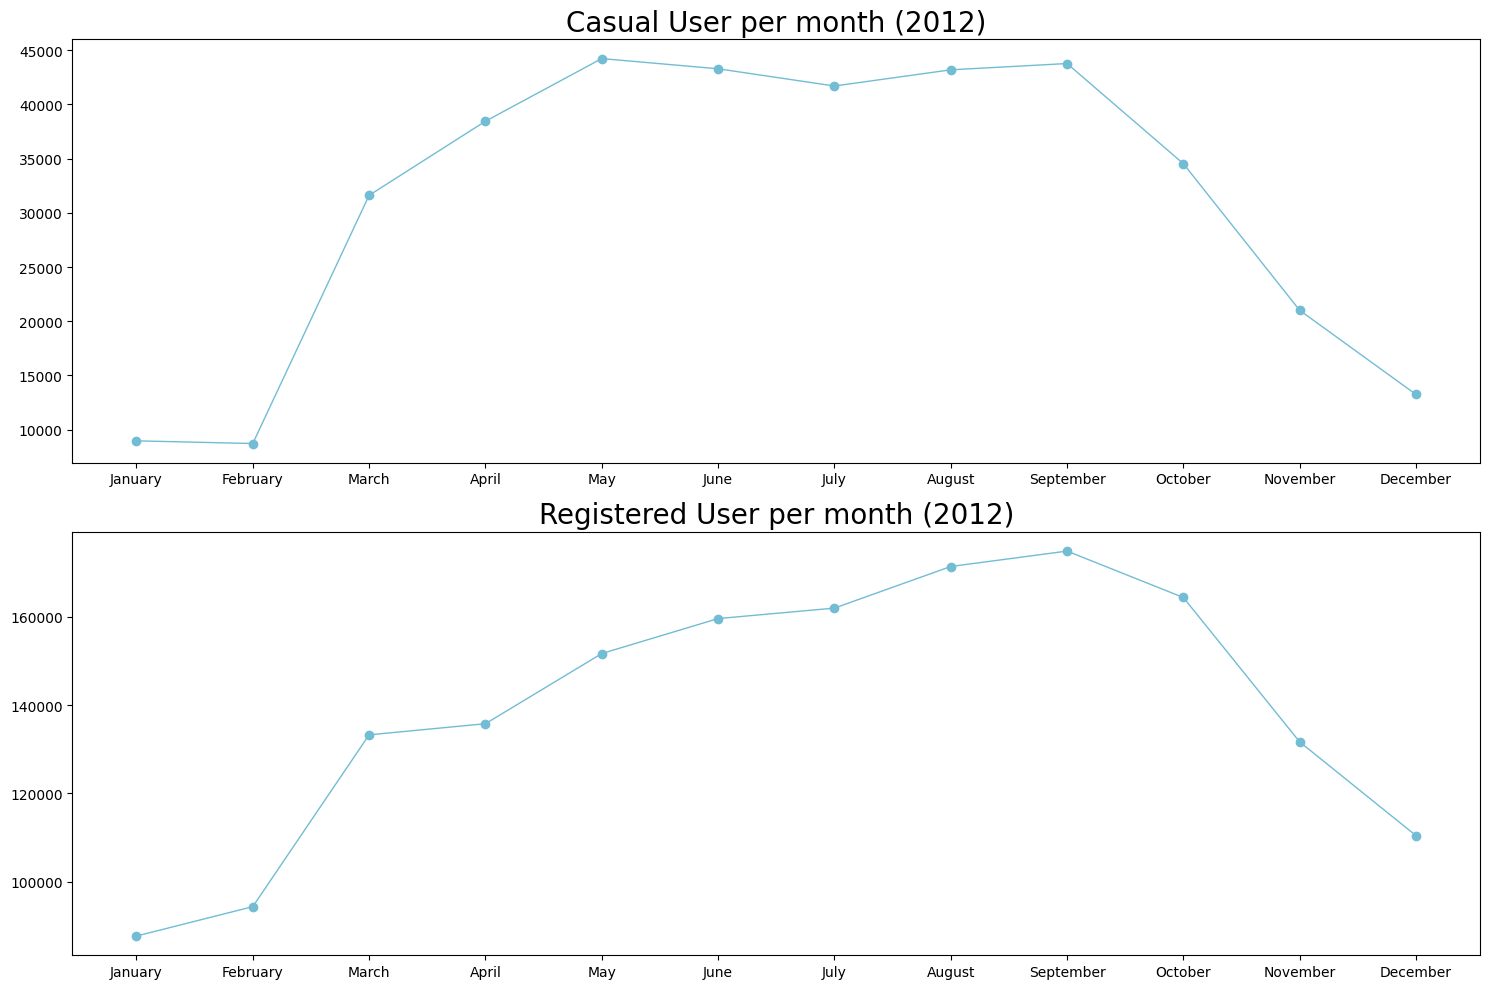

In [ ]:
bike_2021=bike[bike['dteday'].dt.year==2012]
monthly_orders_df = bike_2021.resample(rule='M', on='dteday').agg({
    "casual":"sum",
    "registered":"sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "casual":"Pengguna_Casual",
    "registered":"Pengguna_registered"
}, inplace=True)

plt.figure(figsize=(15, 10)) 
plt.subplot(2, 1, 1)
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["Pengguna_Casual"], marker='o', linewidth=1, color="#72BCD4") 
plt.title("Casual User per month (2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

plt.subplot(2, 1, 2)
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["Pengguna_registered"], marker='o', linewidth=1, color="#72BCD4") 
plt.title("Registered User per month (2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

plt.tight_layout()

plt.show()

**Analisis Line Chart Registered dan Casual user di 2011**
- Dimulai dari januari - februari, penggunaan bike sharing oleh pengguna casual masih belum ada peningkatan, pada registered terdapat peningkatan pengguna walaupun belum signifikan
- Februari-Maret merupakan lonjakan pengguna layanan bike sharing, hal ini berbeda dari tahun sebelumnya, maka perlu adanya penyelidikan penyebab lonjakan ini terjadi
- pada bulan September, casual dan registered mencapai puncaknya dengan timing yang bersamaan, hal ini berarti kesamaan trend yang terjadi.
- untuk trend penurunan pengguna pun terjadi bersamaan yaitu dari october-desember. sama seperti tahun sebelumnya, sehingga memang perlu diselidiki hal pernyebab penurunan penggunaan bike sharing pada bulan october-desember.

### Pertanyaan 1:

In [ ]:
#Pada range jam berapa pengguna layanan bike sharing akan mengalami peningkatan ?

### Pertanyaan 2:

In [ ]:
#Bagaimana performa pengguna registered dan casual dalam penggunaan bike sharing setiap bulannya ?

## Conclusion

- Conclusion Pertanyaan 1 : terdapat 2 range jam yang mengalami peningkatan yaitu pada range 6-8 dan 16-17, hal ini disebabkan oleh mobilitas berangkat dan pulang, sehingga pada range itulah yang menyumbang keuntungan tertinggi untuk layanan bike sharing
- Conlusion Pertanyaan 2 : Trend peningkatan penggunaan pada registered dan casual memiliki beberapa perbedaan, namun untuk trend penurunan penggunaan pada registered dan casual selalu terjadi pada bulan oktober-desember, hal ini tentunya diperlukan analisis yang lebih dalam untuk mengetahui penyebab penurunan pada timing yang sama 2 tahun berturut-turut.